# Chirp mass vs redshift for lensed and unlensed events

In [1]:
import json
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
from scipy.interpolate import interp1d

## Generation of data

In [1]:
from ler.rates import LeR

ler = LeR()
print()
print(ler.available_gw_prior_list_and_its_params)
print(ler.lens_param_samplers)
print(ler.available_lens_functions)
print(ler.available_lens_prior_list_and_its_params)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_2.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_5.pickle
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_pickle/merger_rate_density_bbh_popI_II_oguri2018/merger_rate_density_bbh_popI_II_oguri2018_5.pickle
z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_2.pickle
velocity_dispersion_gengamma interpolator will be l

In [1]:
# SIE lens model
from ler.rates import LeR
import numpy as np
#from numba import njit
# geocent_time=njit(lambda size: np.random.uniform(1238166018, 1238166018 + 31536000, size)),

ler = LeR(
    npool=4,
    source_priors=dict(
        merger_rate_density='merger_rate_density_bbh_popI_II_oguri2018',
        source_frame_masses='binary_masses_BBH_popI_II_powerlaw_gaussian',
        geocent_time=lambda size: np.random.uniform(1238166018, 1238166018 + 31536000, size),
    ),
    source_priors_params=dict(
        merger_rate_density={'R0': 25e-09, 'b2': 1.6, 'b3': 2.0, 'b4': 30},
        source_frame_masses={'mminbh': 4.98, 'mmaxbh': 112.5, 'alpha': 3.78, 'mu_g': 32.27, 'sigma_g': 3.88, 'lambda_peak': 0.03, 'delta_m': 4.8, 'beta': 0.81},
        geocent_time=None,
    ),
    lens_functions=dict(
        strong_lensing_condition='rjs_with_cross_section',
        optical_depth='optical_depth_SIE_hemanta',
    ),
    lens_priors=dict(
        velocity_dispersion='velocity_dispersion_ewoud',
        axis_ratio='axis_ratio_rayleigh',
    ),
    lens_priors_params=dict(
        velocity_dispersion=None,
        axis_ratio=dict(q_min=0.2, q_max=1.),
    ),
    create_new_interpolator=dict(
        redshift_distribution=dict(create_new=False, resolution=500),
        velocity_dispersion=dict(create_new=False, resolution=100),
        optical_depth=dict(create_new=False, resolution=100),
    ),
)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_2.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_5.pickle
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_pickle/merger_rate_density_bbh_popI_II_oguri2018/merger_rate_density_bbh_popI_II_oguri2018_4.pickle
z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_2.pickle
velocity_dispersion_ewoud interpolator will be load

In [3]:
ler.batch_size = 50000
unlensed_param = ler.unlensed_cbc_statistics(size=1000000, json_file="./unlensed_bbh_1M_new.json",resume=True);

chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 20 batche(s)
resuming from ./unlensed_bbh_1M_new.json


In [2]:
ler.batch_size = 50000
lensed_param = ler.lensed_cbc_statistics(size=1000000, json_file="./lensed_bbh_1M_new.json", resume=True);
# lensed_param = ler.lensed_cbc_statistics(size=100000, resume=False);

chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 20 batche(s)
resuming from ./lensed_bbh_1M_new.json
Batch no. 17
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:12<00:00, 3884.52it/s]


calculating snrs...
50000
Batch no. 18
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:12<00:00, 3886.52it/s]


calculating snrs...
50000
Batch no. 19
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:13<00:00, 3778.59it/s]


calculating snrs...
50000
Batch no. 20
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:13<00:00, 3837.94it/s]


calculating snrs...
50000


In [5]:
np.array([True,False]).astype(int)

array([1, 0])

In [3]:
ler.lensed_rate(lensed_param=lensed_param);

using provided lensed_param dict...
total lensed rate (yr^-1) (with step function): 1.5799494232694806
storing detectable lensed params in ./lensed_param_detectable.json


In [4]:
365*24*3600*2

63072000

In [3]:
ler.rate_comparision_with_rate_calculation(
    unlensed_param="./unlensed_bbh_1M_new.json",
    lensed_param="./lensed_bbh_1M_new.json",
);

getting unlensed_params from json file ./unlensed_bbh_1M_new.json...
total unlensed rate (yr^-1) (with step function): 456.7430196757595
storing detectable unlensed params in ./unlensed_param_detectable.json
getting lensed_params from json file ./lensed_bbh_1M_new.json...
total lensed rate (yr^-1) (with step function): 0.0
storing detectable lensed params in ./lensed_param_detectable.json
unlensed_rate: 456.7430196757595
lensed_rate: 0.0
ratio: inf


In [3]:
# get data from json file
import json
import numpy as np

with open('./geocent_time.json') as f:
    geocent_time = json.load(f)
with open("./effective_geocent_time.json") as f:
    effective_geocent_time = json.load(f)

In [4]:
import bilby_cython
for i in range(len(geocent_time)):
    try:
        test1 = bilby_cython.time.gps_time_to_utc(geocent_time[i])
        test2 = bilby_cython.time.gps_time_to_utc(effective_geocent_time[i])
    except:
        print(i)
        print(geocent_time[i])
        print(effective_geocent_time[i])
        break

3651
275868059448.6159
275868059448.6159


In [21]:
# 2 years in seconds
365*24*3600*2

63072000

In [6]:
test = np.array(geocent_time)
idx = (test>1238166018) & (test<1238166018 + 31536000)
np.sum(idx)

49616

In [8]:
from ler.utils import inverse_transform_sampler

x = np.linspace(1238166018, 1238166018 + 31536000, 1000)
cdf = (1/31536000)*(x-1238166018)

test = inverse_transform_sampler(1000000, cdf, x)

In [9]:
idx = (test>1238166018) & (test<1238166018 + 31536000)
np.sum(idx)

1000000

In [16]:
for i in range(10000):
    test = ler.sample_geocent_time(100000)
    idx = test > 1269702018
    if np.sum(idx) > 0:
        print(i)
        print(test[idx])
        break

KeyboardInterrupt: 

In [18]:
test

array([1.24534723e+09, 1.26652689e+09, 1.26357473e+09, ...,
       1.24169263e+09, 1.24696807e+09, 1.24344714e+09])

In [16]:
test = np.array(geocent_time)>1269702018
np.sum(test)

24787

In [14]:
np.sum(test)

8865

In [11]:
test = (np.min(effective_geocent_time)-effective_geocent_time)>63072000
np.sum(test)

0

In [8]:
ler.sample_geocent_time(10)

array([1.25338791e+09, 1.25743655e+09, 1.25574578e+09,
       1.25859782e+09, 1.25501693e+09, 1.24361083e+09,
       1.26372155e+09, 1.24731827e+09, 1.26696658e+09,
       1.25574932e+09])

## Getting data

In [2]:
# getting data from json
# all
with open("./unlensed_bbh_1M_new.json") as f:
    unlensed_params = json.load(f)
with open("./lensed_bbh_1M_new.json") as f:
    lensed_params = json.load(f)
# detectable
# with open("./unlensed_params_detectable_BBH_1M.json") as f:
#     unlensed_params_detectable = json.load(f)
# with open("./lensed_params_detectable_BBH_1M.json") as f:
#     lensed_params_detectable = json.load(f)

In [3]:
# for coversion, from luminosity distance to redshift
z = np.linspace(0, 10, 1000)
luminosity_distance = cosmo.luminosity_distance(z).value
luminosity_distance_to_z = interp1d(luminosity_distance, z, kind='cubic', fill_value='extrapolate')

## For unlensed events

In [4]:
# source frame masses
mass_1_unlensed_source = np.array(unlensed_params['mass_1_source'])
mass_2_unlensed_source = np.array(unlensed_params['mass_2_source'])
mc_unlensed_source = (mass_1_unlensed_source*mass_2_unlensed_source)**(3/5)/(mass_1_unlensed_source+mass_2_unlensed_source)**(1/5)


# detector fame
# unlensed events detectable
mass_1_unlensed = np.array(unlensed_params['mass_1'])
mass_2_unlensed = np.array(unlensed_params['mass_2'])

# chirp mass from m1 and m2
mc_unlensed = (mass_1_unlensed*mass_2_unlensed)**(3/5)/(mass_1_unlensed+mass_2_unlensed)**(1/5)

# redshifts
zs_unlensed = np.array(unlensed_params['zs'])

In [5]:
# selecting with SNRs>8
snr_threshold = 8
snrs = unlensed_params["opt_snr_net"]
snrs = np.array(snrs).flatten()
idx = snrs>snr_threshold

# detectable unlensed events
mc_unlensed_ = mc_unlensed[idx]
zs_unlensed_ = zs_unlensed[idx]
mc_unlensed_source_ = mc_unlensed_/(1+zs_unlensed_)

## For lensed events

In [6]:
mass_1_lensed = np.array(lensed_params['mass_1'])
mass_2_lensed = np.array(lensed_params['mass_2'])

# chirp mass from m1 and m2
mc_lensed = (mass_1_lensed*mass_2_lensed)**(3/5)/(mass_1_lensed+mass_2_lensed)**(1/5)
mc_lensed = np.array([mc_lensed,mc_lensed,mc_lensed,mc_lensed]).T

# redshifts
zs_lensed = np.array(lensed_params['zs'])

# to find the effective chirp mass
mu = np.abs(np.array(lensed_params['magnifications']))

# get the luminosity distance
dl = np.array(lensed_params['luminosity_distance'])
dl = np.array([dl,dl,dl,dl]).T

# find the effective luminosity distance
dl_eff = dl/np.sqrt(mu)
# find the effective redshift
zs_eff = luminosity_distance_to_z(dl_eff)

In [7]:
# selecting with SNRs>8
snrs = lensed_params["opt_snr_net"]
snrs = np.array(snrs).flatten()
idx2 = snrs>8

# detectable lensed events
mc_lensed_ = mc_lensed.flatten()[idx2]
zs_eff_ = zs_eff.flatten()[idx2]
mc_lensed_source_ = mc_lensed_/(1+zs_eff_)

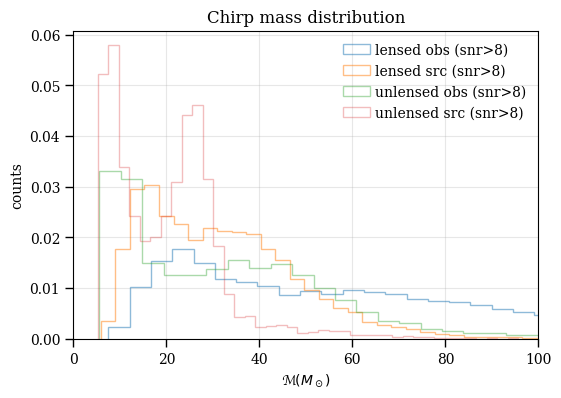

In [12]:
# mc distribution
plt.figure(figsize=(6,4))
plt.hist(mc_lensed_, bins=40, density=True, alpha=0.5, label="lensed obs (snr>8)", histtype='step')
plt.hist(mc_lensed_source_, bins=40, density=True, alpha=0.5, label="lensed src (snr>8)", histtype='step')
plt.hist(mc_unlensed_, bins=40, density=True, alpha=0.4, label="unlensed obs (snr>8)", histtype='step')
plt.hist(mc_unlensed_source_, bins=40, density=True, alpha=0.3, label="unlensed src (snr>8)", histtype='step')
plt.xlim(0, 100)
#plt.ylim(0, 0.075)
plt.xlabel(r"$\mathcal{M} (M_\odot)$")
plt.ylabel("counts")
plt.title("Chirp mass distribution")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

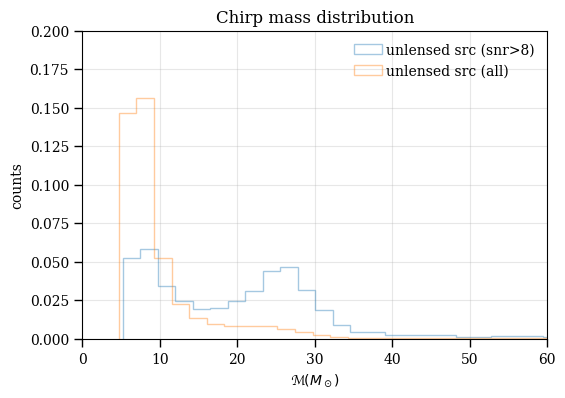

In [9]:
# mc distribution
plt.figure(figsize=(6,4))
plt.hist(mc_unlensed_source_, bins=40, density=True, alpha=0.4, label="unlensed src (snr>8)", histtype='step')
plt.hist(mc_unlensed_source, bins=40, density=True, alpha=0.4, label="unlensed src (all)", histtype='step')
plt.xlim(0, 60)
plt.ylim(0, 0.2)
plt.xlabel(r"$\mathcal{M} (M_\odot)$")
plt.ylabel("counts")
plt.title("Chirp mass distribution")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

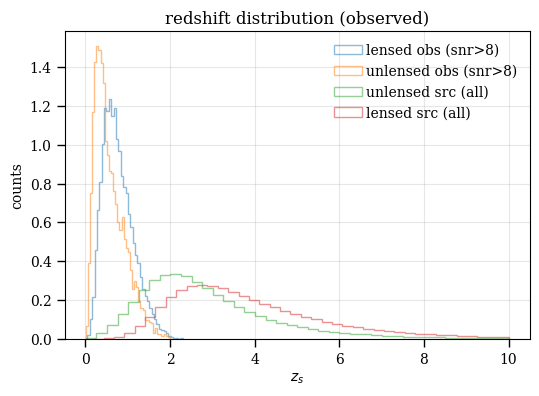

In [10]:
# zs distribution
plt.figure(figsize=(6,4))
plt.hist(zs_eff_, bins=40, density=True, alpha=0.5, label="lensed obs (snr>8)", histtype='step')
plt.hist(zs_unlensed_, bins=40, density=True, alpha=0.5, label="unlensed obs (snr>8)", histtype='step')
plt.hist(zs_unlensed, bins=40, density=True, alpha=0.5, label="unlensed src (all)", histtype='step')
plt.hist(zs_lensed, bins=40, density=True, alpha=0.5, label="lensed src (all)", histtype='step')
plt.xlabel(r"$z_s$")
plt.ylabel("counts")
#plt.xscale("log")
#plt.yscale("log")
plt.title("redshift distribution (observed)")
plt.legend()
# plt.xlim(0,8)
plt.grid(alpha=0.3)
plt.show()

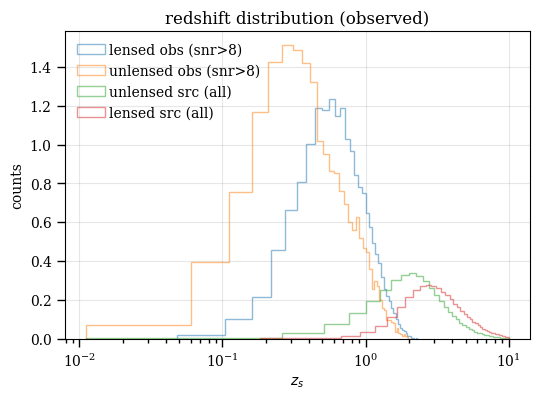

In [11]:
# zs distribution
plt.figure(figsize=(6,4))
plt.hist(zs_eff_, bins=40, density=True, alpha=0.5, label="lensed obs (snr>8)", histtype='step')
plt.hist(zs_unlensed_, bins=40, density=True, alpha=0.5, label="unlensed obs (snr>8)", histtype='step')
plt.hist(zs_unlensed, bins=40, density=True, alpha=0.5, label="unlensed src (all)", histtype='step')
plt.hist(zs_lensed, bins=40, density=True, alpha=0.5, label="lensed src (all)", histtype='step')
plt.xlabel(r"$z_s$")
plt.ylabel("counts")
plt.xscale("log")
#plt.yscale("log")
plt.title("redshift distribution (observed)")
plt.legend()
# plt.xlim(0,8)
plt.grid(alpha=0.3)
plt.show()

In [13]:
from scipy.stats import norm, gaussian_kde
from scipy.interpolate import interp1d
contour_levels=[0.10, 0.40, 0.68]
linestyles="-"
origin="upper"
alpha=0.6
extent=[0.001, 10, 5, 200]

In [14]:
# lensed case
x_array = zs_eff_
y_array = mc_lensed_
# applying cutt-off
# idx = (
#     (x_array > extent[0])
#     & (x_array < extent[1])
#     & (y_array > extent[2])
#     & (y_array < extent[3])
# )
# xu = x_array[idx]
# yu = y_array[idx]
xu = x_array
yu = y_array

xmin = extent[0]
xmax = extent[1]
ymin = extent[2]
ymax = extent[3]

xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([xu, yu])
kernel = gaussian_kde(values)
ff = np.reshape(kernel(positions).T, xx.shape)

zsort = -np.sort(-ff.flatten())

cumz = np.cumsum(zsort) / np.sum(zsort)
spl = interp1d(cumz, zsort)

levels1 = []
for i in contour_levels:
    levels1.append(spl(i))
levels1 = np.array(levels1)[::-1]

In [15]:
# unlensed
x_array = zs_unlensed_
y_array = mc_unlensed_
# applying cutt-off
# idx = (
#     (x_array > extent[0])
#     & (x_array < extent[1])
#     & (y_array > extent[2])
#     & (y_array < extent[3])
# )
# xu = x_array[idx]
# yu = y_array[idx]
xu = x_array
yu = y_array

xmin = extent[0]
xmax = extent[1]
ymin = extent[2]
ymax = extent[3]

xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([xu, yu])
kernel = gaussian_kde(values)
ff = np.reshape(kernel(positions).T, xx.shape)

zsort = -np.sort(-ff.flatten())

cumz = np.cumsum(zsort) / np.sum(zsort)
spl = interp1d(cumz, zsort)

levels2 = []
for i in contour_levels:
    levels2.append(spl(i))
levels2 = np.array(levels2)[::-1]

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_88306/584013099.py:2: UserWarning: The following kwargs were not used by contour: 'labels'
  ax.contour(


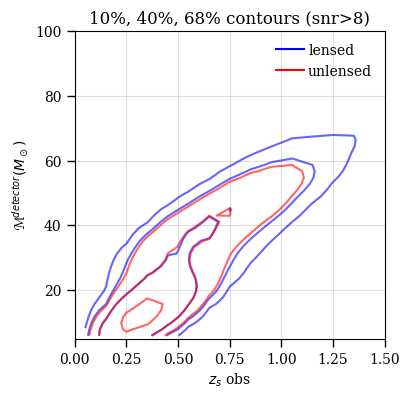

In [16]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.contour(
    np.rot90(ff),
    levels1,
    colors="blue",
    linestyles=linestyles,
    origin=origin,
    alpha=alpha,
    extent=extent,
    labels="lensed"
)
ax.contour(
    np.rot90(ff),
    levels2,
    colors="red",
    linestyles=linestyles,
    origin=origin,
    alpha=alpha,
    extent=extent,
)

# legend
custom_lines = [Line2D([0], [0], color='blue', lw=1.5),
                Line2D([0], [0], color='red', lw=1.5)]
plt.legend(custom_lines, ['lensed', 'unlensed'])

# ax.set_xlim(extent[0], extent[1])
# ax.set_ylim(extent[2], extent[3])
ax.set_xlim(0, 1.5)
ax.set_ylim(5, 100)
ax.set_ylabel(r"$\mathcal{M}^{detector} (M_\odot)$")
ax.set_xlabel(r"$z_s$ obs")
ax.set_title("10%, 40%, 68% contours (snr>8)")
ax.grid(alpha=0.4)
plt.show()

In [17]:
extent=[0.001, 10, 5, 100]

In [18]:
# lensed case
x_array = zs_eff_
y_array = mc_lensed_source_
# applying cutt-off
# idx = (
#     (x_array > extent[0])
#     & (x_array < extent[1])
#     & (y_array > extent[2])
#     & (y_array < extent[3])
# )
# xu = x_array[idx]
# yu = y_array[idx]
xu = x_array
yu = y_array

xmin = extent[0]
xmax = extent[1]
ymin = extent[2]
ymax = extent[3]

xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([xu, yu])
kernel = gaussian_kde(values)
ff = np.reshape(kernel(positions).T, xx.shape)

zsort = -np.sort(-ff.flatten())

cumz = np.cumsum(zsort) / np.sum(zsort)
spl = interp1d(cumz, zsort)

levels1 = []
for i in contour_levels:
    levels1.append(spl(i))
levels1 = np.array(levels1)[::-1]

In [19]:
# unlensed
x_array = zs_unlensed_
y_array = mc_unlensed_source_
# applying cutt-off
# idx = (
#     (x_array > extent[0])
#     & (x_array < extent[1])
#     & (y_array > extent[2])
#     & (y_array < extent[3])
# )
# xu = x_array[idx]
# yu = y_array[idx]
xu = x_array
yu = y_array

xmin = extent[0]
xmax = extent[1]
ymin = extent[2]
ymax = extent[3]

xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([xu, yu])
kernel = gaussian_kde(values)
ff = np.reshape(kernel(positions).T, xx.shape)

zsort = -np.sort(-ff.flatten())

cumz = np.cumsum(zsort) / np.sum(zsort)
spl = interp1d(cumz, zsort)

levels2 = []
for i in contour_levels:
    levels2.append(spl(i))
levels2 = np.array(levels2)[::-1]

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_88306/2839345660.py:2: UserWarning: The following kwargs were not used by contour: 'labels'
  ax.contour(


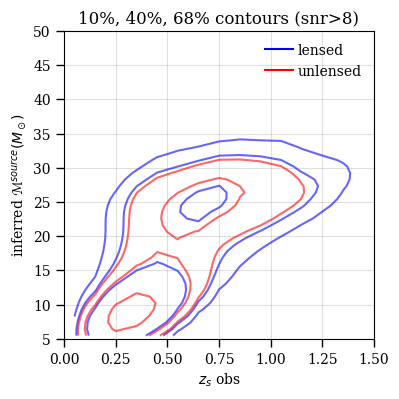

In [20]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.contour(
    np.rot90(ff),
    levels1,
    colors="blue",
    linestyles=linestyles,
    origin=origin,
    alpha=alpha,
    extent=extent,
    labels="lensed"
)
ax.contour(
    np.rot90(ff),
    levels2,
    colors="red",
    linestyles=linestyles,
    origin=origin,
    alpha=alpha,
    extent=extent,
)

# legend
custom_lines = [Line2D([0], [0], color='blue', lw=1.5),
                Line2D([0], [0], color='red', lw=1.5)]
plt.legend(custom_lines, ['lensed', 'unlensed'])

# ax.set_xlim(extent[0], extent[1])
# ax.set_ylim(extent[2], extent[3])
ax.set_xlim(0, 1.5)
ax.set_ylim(5, 50)
ax.set_ylabel(r"inferred $\mathcal{M}^{source} (M_\odot)$")
ax.set_xlabel(r"$z_s$ obs")
ax.set_title("10%, 40%, 68% contours (snr>8)")
ax.grid(alpha=0.4)
plt.show()